In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from matplotlib import patches
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import os
import math
import random

import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.metrics import roc_curve, roc_auc_score, auc

import scipy.stats as st
from scipy.stats import poisson
from scipy.interpolate import interp1d
from scipy.stats import norm

In [2]:
from sklearn.neighbors import KernelDensity # paquete necesario
from sklearn.model_selection import GridSearchCV

import scipy.integrate as integrate

### TODOS JUNTOS

In [3]:
LQ800_results_16bins_beta = np.loadtxt('saved-results/LQup800GeV.txt')[0]
LQ800_results_16bins_beta_plus = np.loadtxt('saved-results/LQup800GeV.txt')[1]
LQ800_results_16bins_beta_min = np.loadtxt('saved-results/LQup800GeV.txt')[2]

LQ800_results_MLL_KDE_beta = np.loadtxt('saved-results/LQup800GeV.txt')[9]
LQ800_results_MLL_KDE_beta_plus = np.loadtxt('saved-results/LQup800GeV.txt')[10]
LQ800_results_MLL_KDE_beta_min = np.loadtxt('saved-results/LQup800GeV.txt')[11]

In [4]:
LQ1000_results_16bins_beta = np.loadtxt('saved-results/LQup1000GeV.txt')[0]
LQ1000_results_16bins_beta_plus = np.loadtxt('saved-results/LQup1000GeV.txt')[1]
LQ1000_results_16bins_beta_min = np.loadtxt('saved-results/LQup1000GeV.txt')[2]

LQ1000_results_MLL_KDE_beta = np.loadtxt('saved-results/LQup1000GeV.txt')[9]
LQ1000_results_MLL_KDE_beta_plus = np.loadtxt('saved-results/LQup1000GeV.txt')[10]
LQ1000_results_MLL_KDE_beta_min = np.loadtxt('saved-results/LQup1000GeV.txt')[11]

In [5]:
LQ1200_results_16bins_beta = np.loadtxt('saved-results/LQup1200GeV.txt')[0]
LQ1200_results_16bins_beta_plus = np.loadtxt('saved-results/LQup1200GeV.txt')[1]
LQ1200_results_16bins_beta_min = np.loadtxt('saved-results/LQup1200GeV.txt')[2]

LQ1200_results_MLL_KDE_beta = np.loadtxt('saved-results/LQup1200GeV.txt')[9]
LQ1200_results_MLL_KDE_beta_plus = np.loadtxt('saved-results/LQup1200GeV.txt')[10]
LQ1200_results_MLL_KDE_beta_min = np.loadtxt('saved-results/LQup1200GeV.txt')[11]

In [6]:
LQ1400_results_16bins_beta = np.loadtxt('saved-results/LQup1400GeV.txt')[0]
LQ1400_results_16bins_beta_plus = np.loadtxt('saved-results/LQup1400GeV.txt')[1]
LQ1400_results_16bins_beta_min = np.loadtxt('saved-results/LQup1400GeV.txt')[2]

LQ1400_results_MLL_KDE_beta = np.loadtxt('saved-results/LQup1400GeV.txt')[9]
LQ1400_results_MLL_KDE_beta_plus = np.loadtxt('saved-results/LQup1400GeV.txt')[10]
LQ1400_results_MLL_KDE_beta_min = np.loadtxt('saved-results/LQup1400GeV.txt')[11]

In [7]:
LQ1600_results_16bins_beta = np.loadtxt('saved-results/LQup1600GeV.txt')[0]
LQ1600_results_16bins_beta_plus = np.loadtxt('saved-results/LQup1600GeV.txt')[1]
LQ1600_results_16bins_beta_min = np.loadtxt('saved-results/LQup1600GeV.txt')[2]

LQ1600_results_MLL_KDE_beta = np.loadtxt('saved-results/LQup1600GeV.txt')[9]
LQ1600_results_MLL_KDE_beta_plus = np.loadtxt('saved-results/LQup1600GeV.txt')[10]
LQ1600_results_MLL_KDE_beta_min = np.loadtxt('saved-results/LQup1600GeV.txt')[11]

In [8]:
LQ1800_results_16bins_beta = np.loadtxt('saved-results/LQup1800GeV.txt')[0]
LQ1800_results_16bins_beta_plus = np.loadtxt('saved-results/LQup1800GeV.txt')[1]
LQ1800_results_16bins_beta_min = np.loadtxt('saved-results/LQup1800GeV.txt')[2]

LQ1800_results_MLL_KDE_beta = np.loadtxt('saved-results/LQup1800GeV.txt')[9]
LQ1800_results_MLL_KDE_beta_plus = np.loadtxt('saved-results/LQup1800GeV.txt')[10]
LQ1800_results_MLL_KDE_beta_min = np.loadtxt('saved-results/LQup1800GeV.txt')[11]

In [9]:
results_16bins_beta01 = [LQ800_results_16bins_beta[0],LQ1000_results_16bins_beta[0],LQ1200_results_16bins_beta[0],LQ1400_results_16bins_beta[0],LQ1600_results_16bins_beta[0],LQ1800_results_16bins_beta[0]]
results_16bins_plus_beta01 = [LQ800_results_16bins_beta_plus[0],LQ1000_results_16bins_beta_plus[0],LQ1200_results_16bins_beta_plus[0],LQ1400_results_16bins_beta_plus[0],LQ1600_results_16bins_beta_plus[0],LQ1800_results_16bins_beta_plus[0]]
results_16bins_min_beta01 = [LQ800_results_16bins_beta_min[0],LQ1000_results_16bins_beta_min[0],LQ1200_results_16bins_beta_min[0],LQ1400_results_16bins_beta_min[0],LQ1600_results_16bins_beta_min[0],LQ1800_results_16bins_beta_min[0]]

results_MLL_KDE_beta01 = [LQ800_results_MLL_KDE_beta[0],LQ1000_results_MLL_KDE_beta[0],LQ1200_results_MLL_KDE_beta[0],LQ1400_results_MLL_KDE_beta[0],LQ1600_results_MLL_KDE_beta[0],LQ1800_results_MLL_KDE_beta[0]]
results_MLL_KDE_plus_beta01 = [LQ800_results_MLL_KDE_beta_plus[0],LQ1000_results_MLL_KDE_beta_plus[0],LQ1200_results_MLL_KDE_beta_plus[0],LQ1400_results_MLL_KDE_beta_plus[0],LQ1600_results_MLL_KDE_beta_plus[0],LQ1800_results_MLL_KDE_beta_plus[0]]
results_MLL_KDE_min_beta01 = [LQ800_results_MLL_KDE_beta_min[0],LQ1000_results_MLL_KDE_beta_min[0],LQ1200_results_MLL_KDE_beta_min[0],LQ1400_results_MLL_KDE_beta_min[0],LQ1600_results_MLL_KDE_beta_min[0],LQ1800_results_MLL_KDE_beta_min[0]]


results_16bins_beta03 = [LQ800_results_16bins_beta[1],LQ1000_results_16bins_beta[1],LQ1200_results_16bins_beta[1],LQ1400_results_16bins_beta[1],LQ1600_results_16bins_beta[1],LQ1800_results_16bins_beta[1]]
results_16bins_plus_beta03 = [LQ800_results_16bins_beta_plus[1],LQ1000_results_16bins_beta_plus[1],LQ1200_results_16bins_beta_plus[1],LQ1400_results_16bins_beta_plus[1],LQ1600_results_16bins_beta_plus[1],LQ1800_results_16bins_beta_plus[1]]
results_16bins_min_beta03 = [LQ800_results_16bins_beta_min[1],LQ1000_results_16bins_beta_min[1],LQ1200_results_16bins_beta_min[1],LQ1400_results_16bins_beta_min[1],LQ1600_results_16bins_beta_min[1],LQ1800_results_16bins_beta_min[1]]

results_MLL_KDE_beta03 = [LQ800_results_MLL_KDE_beta[1],LQ1000_results_MLL_KDE_beta[1],LQ1200_results_MLL_KDE_beta[1],LQ1400_results_MLL_KDE_beta[1],LQ1600_results_MLL_KDE_beta[1],LQ1800_results_MLL_KDE_beta[1]]
results_MLL_KDE_plus_beta03 = [LQ800_results_MLL_KDE_beta_plus[1],LQ1000_results_MLL_KDE_beta_plus[1],LQ1200_results_MLL_KDE_beta_plus[1],LQ1400_results_MLL_KDE_beta_plus[1],LQ1600_results_MLL_KDE_beta_plus[1],LQ1800_results_MLL_KDE_beta_plus[1]]
results_MLL_KDE_min_beta03 = [LQ800_results_MLL_KDE_beta_min[1],LQ1000_results_MLL_KDE_beta_min[1],LQ1200_results_MLL_KDE_beta_min[1],LQ1400_results_MLL_KDE_beta_min[1],LQ1600_results_MLL_KDE_beta_min[1],LQ1800_results_MLL_KDE_beta_min[1]]


results_16bins_beta05 = [LQ800_results_16bins_beta[2],LQ1000_results_16bins_beta[2],LQ1200_results_16bins_beta[2],LQ1400_results_16bins_beta[2],LQ1600_results_16bins_beta[2],LQ1800_results_16bins_beta[2]]
results_16bins_plus_beta05 = [LQ800_results_16bins_beta_plus[2],LQ1000_results_16bins_beta_plus[2],LQ1200_results_16bins_beta_plus[2],LQ1400_results_16bins_beta_plus[2],LQ1600_results_16bins_beta_plus[2],LQ1800_results_16bins_beta_plus[2]]
results_16bins_min_beta05 = [LQ800_results_16bins_beta_min[2],LQ1000_results_16bins_beta_min[2],LQ1200_results_16bins_beta_min[2],LQ1400_results_16bins_beta_min[2],LQ1600_results_16bins_beta_min[2],LQ1800_results_16bins_beta_min[2]]

results_MLL_KDE_beta05 = [LQ800_results_MLL_KDE_beta[2],LQ1000_results_MLL_KDE_beta[2],LQ1200_results_MLL_KDE_beta[2],LQ1400_results_MLL_KDE_beta[2],LQ1600_results_MLL_KDE_beta[2],LQ1800_results_MLL_KDE_beta[2]]
results_MLL_KDE_plus_beta05 = [LQ800_results_MLL_KDE_beta_plus[2],LQ1000_results_MLL_KDE_beta_plus[2],LQ1200_results_MLL_KDE_beta_plus[2],LQ1400_results_MLL_KDE_beta_plus[2],LQ1600_results_MLL_KDE_beta_plus[2],LQ1800_results_MLL_KDE_beta_plus[2]]
results_MLL_KDE_min_beta05 = [LQ800_results_MLL_KDE_beta_min[2],LQ1000_results_MLL_KDE_beta_min[2],LQ1200_results_MLL_KDE_beta_min[2],LQ1400_results_MLL_KDE_beta_min[2],LQ1600_results_MLL_KDE_beta_min[2],LQ1800_results_MLL_KDE_beta_min[2]]


results_16bins_beta07 = [LQ800_results_16bins_beta[3],LQ1000_results_16bins_beta[3],LQ1200_results_16bins_beta[3],LQ1400_results_16bins_beta[3],LQ1600_results_16bins_beta[3],LQ1800_results_16bins_beta[3]]
results_16bins_plus_beta07 = [LQ800_results_16bins_beta_plus[3],LQ1000_results_16bins_beta_plus[3],LQ1200_results_16bins_beta_plus[3],LQ1400_results_16bins_beta_plus[3],LQ1600_results_16bins_beta_plus[3],LQ1800_results_16bins_beta_plus[3]]
results_16bins_min_beta07 = [LQ800_results_16bins_beta_min[3],LQ1000_results_16bins_beta_min[3],LQ1200_results_16bins_beta_min[3],LQ1400_results_16bins_beta_min[3],LQ1600_results_16bins_beta_min[3],LQ1800_results_16bins_beta_min[3]]

results_MLL_KDE_beta07 = [LQ800_results_MLL_KDE_beta[3],LQ1000_results_MLL_KDE_beta[3],LQ1200_results_MLL_KDE_beta[3],LQ1400_results_MLL_KDE_beta[3],LQ1600_results_MLL_KDE_beta[3],LQ1800_results_MLL_KDE_beta[3]]
results_MLL_KDE_plus_beta07 = [LQ800_results_MLL_KDE_beta_plus[3],LQ1000_results_MLL_KDE_beta_plus[3],LQ1200_results_MLL_KDE_beta_plus[3],LQ1400_results_MLL_KDE_beta_plus[3],LQ1600_results_MLL_KDE_beta_plus[3],LQ1800_results_MLL_KDE_beta_plus[3]]
results_MLL_KDE_min_beta07 = [LQ800_results_MLL_KDE_beta_min[3],LQ1000_results_MLL_KDE_beta_min[3],LQ1200_results_MLL_KDE_beta_min[3],LQ1400_results_MLL_KDE_beta_min[3],LQ1600_results_MLL_KDE_beta_min[3],LQ1800_results_MLL_KDE_beta_min[3]]


results_16bins_beta09 = [LQ800_results_16bins_beta[4],LQ1000_results_16bins_beta[4],LQ1200_results_16bins_beta[4],LQ1400_results_16bins_beta[4],LQ1600_results_16bins_beta[4],LQ1800_results_16bins_beta[4]]
results_16bins_plus_beta09 = [LQ800_results_16bins_beta_plus[4],LQ1000_results_16bins_beta_plus[4],LQ1200_results_16bins_beta_plus[4],LQ1400_results_16bins_beta_plus[4],LQ1600_results_16bins_beta_plus[4],LQ1800_results_16bins_beta_plus[4]]
results_16bins_min_beta09 = [LQ800_results_16bins_beta_min[4],LQ1000_results_16bins_beta_min[4],LQ1200_results_16bins_beta_min[4],LQ1400_results_16bins_beta_min[4],LQ1600_results_16bins_beta_min[4],LQ1800_results_16bins_beta_min[4]]

results_MLL_KDE_beta09 = [LQ800_results_MLL_KDE_beta[4],LQ1000_results_MLL_KDE_beta[4],LQ1200_results_MLL_KDE_beta[4],LQ1400_results_MLL_KDE_beta[4],LQ1600_results_MLL_KDE_beta[4],LQ1800_results_MLL_KDE_beta[4]]
results_MLL_KDE_plus_beta09 = [LQ800_results_MLL_KDE_beta_plus[4],LQ1000_results_MLL_KDE_beta_plus[4],LQ1200_results_MLL_KDE_beta_plus[4],LQ1400_results_MLL_KDE_beta_plus[4],LQ1600_results_MLL_KDE_beta_plus[4],LQ1800_results_MLL_KDE_beta_plus[4]]
results_MLL_KDE_min_beta09 = [LQ800_results_MLL_KDE_beta_min[4],LQ1000_results_MLL_KDE_beta_min[4],LQ1200_results_MLL_KDE_beta_min[4],LQ1400_results_MLL_KDE_beta_min[4],LQ1600_results_MLL_KDE_beta_min[4],LQ1800_results_MLL_KDE_beta_min[4]]

<ipython-input-10-93a985f625aa>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(masses, results_16bins_beta01, '-ok', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
<ipython-input-10-93a985f625aa>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(masses, results_16bins_plus_beta01, ':ok', color='darkorange', lw=lw)
<ipython-input-10-93a985f625aa>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(masses, results_16bins_min_beta01, ':ok', color='darkorange', lw=lw)
<ipython-input-10-93a985f625aa>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). Th

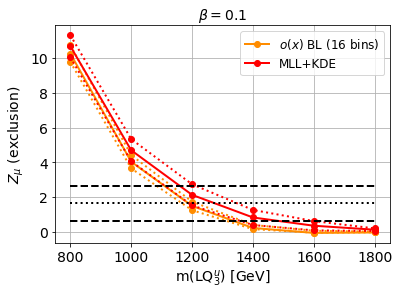

<ipython-input-10-93a985f625aa>:31: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(masses, results_16bins_beta03, '-ok', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
<ipython-input-10-93a985f625aa>:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(masses, results_16bins_plus_beta03, ':ok', color='darkorange', lw=lw)
<ipython-input-10-93a985f625aa>:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(masses, results_16bins_min_beta03, ':ok', color='darkorange', lw=lw)
<ipython-input-10-93a985f625aa>:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). 

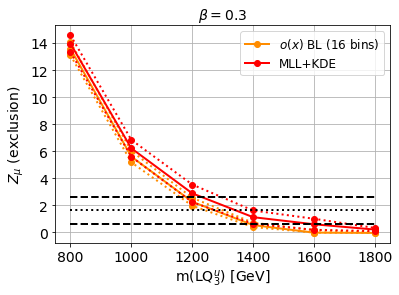

<ipython-input-10-93a985f625aa>:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(masses, results_16bins_beta05, '-ok', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
<ipython-input-10-93a985f625aa>:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(masses, results_16bins_plus_beta05, ':ok', color='darkorange', lw=lw)
<ipython-input-10-93a985f625aa>:56: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(masses, results_16bins_min_beta05, ':ok', color='darkorange', lw=lw)
<ipython-input-10-93a985f625aa>:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). 

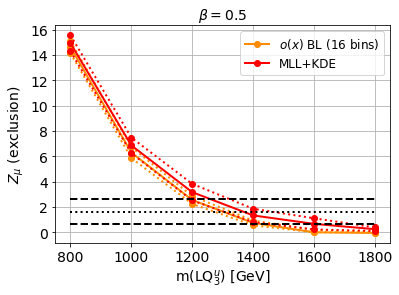

<ipython-input-10-93a985f625aa>:77: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(masses, results_16bins_beta07, '-ok', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
<ipython-input-10-93a985f625aa>:78: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(masses, results_16bins_plus_beta07, ':ok', color='darkorange', lw=lw)
<ipython-input-10-93a985f625aa>:79: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(masses, results_16bins_min_beta07, ':ok', color='darkorange', lw=lw)
<ipython-input-10-93a985f625aa>:80: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). 

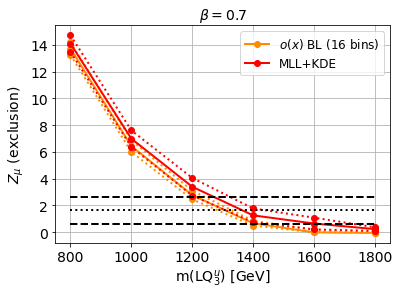

<ipython-input-10-93a985f625aa>:100: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(masses, results_16bins_beta09, '-ok', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
<ipython-input-10-93a985f625aa>:101: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(masses, results_16bins_plus_beta09, ':ok', color='darkorange', lw=lw)
<ipython-input-10-93a985f625aa>:102: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(masses, results_16bins_min_beta09, ':ok', color='darkorange', lw=lw)
<ipython-input-10-93a985f625aa>:103: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k

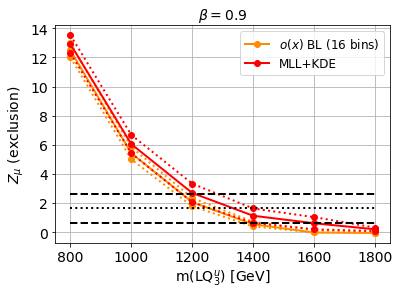

In [10]:
masses = [800, 1000, 1200, 1400, 1600, 1800]

Z164 = [1.64 for x in masses]
Z264 = [2.64 for x in masses]
Z064 = [0.64 for x in masses]

lw=2
plt.plot(masses, results_16bins_beta01, '-ok', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta01, ':ok', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta01, ':ok', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta01, '-ok', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta01, ':ok', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta01, ':ok', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^u$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 0.1$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()


plt.plot(masses, results_16bins_beta03, '-ok', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta03, ':ok', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta03, ':ok', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta03, '-ok', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta03, ':ok', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta03, ':ok', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^u$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 0.3$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()


plt.plot(masses, results_16bins_beta05, '-ok', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta05, ':ok', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta05, ':ok', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta05, '-ok', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta05, ':ok', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta05, ':ok', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^u$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 0.5$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()


plt.plot(masses, results_16bins_beta07, '-ok', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta07, ':ok', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta07, ':ok', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta07, '-ok', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta07, ':ok', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta07, ':ok', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^u$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 0.7$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()


plt.plot(masses, results_16bins_beta09, '-ok', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta09, ':ok', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta09, ':ok', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta09, '-ok', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta09, ':ok', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta09, ':ok', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^u$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 0.9$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()

### Interpolation

In [11]:
# Interpolation, cubic
res_f_16bins_beta01 = interp1d(masses, results_16bins_beta01, kind='quadratic')
res_f_16bins_plus_beta01 = interp1d(masses, results_16bins_plus_beta01, kind='quadratic')
res_f_16bins_min_beta01 = interp1d(masses, results_16bins_min_beta01, kind='quadratic')
res_f_MLL_KDE_beta01 = interp1d(masses, results_MLL_KDE_beta01, kind='quadratic')
res_f_MLL_KDE_plus_beta01 = interp1d(masses, results_MLL_KDE_plus_beta01, kind='quadratic')
res_f_MLL_KDE_min_beta01 = interp1d(masses, results_MLL_KDE_min_beta01, kind='quadratic')

res_f_16bins_beta03 = interp1d(masses, results_16bins_beta03, kind='quadratic')
res_f_16bins_plus_beta03 = interp1d(masses, results_16bins_plus_beta03, kind='quadratic')
res_f_16bins_min_beta03 = interp1d(masses, results_16bins_min_beta03, kind='quadratic')
res_f_MLL_KDE_beta03 = interp1d(masses, results_MLL_KDE_beta03, kind='quadratic')
res_f_MLL_KDE_plus_beta03 = interp1d(masses, results_MLL_KDE_plus_beta03, kind='quadratic')
res_f_MLL_KDE_min_beta03 = interp1d(masses, results_MLL_KDE_min_beta03, kind='quadratic')

res_f_16bins_beta05 = interp1d(masses, results_16bins_beta05, kind='quadratic')
res_f_16bins_plus_beta05 = interp1d(masses, results_16bins_plus_beta05, kind='quadratic')
res_f_16bins_min_beta05 = interp1d(masses, results_16bins_min_beta05, kind='quadratic')
res_f_MLL_KDE_beta05 = interp1d(masses, results_MLL_KDE_beta05, kind='quadratic')
res_f_MLL_KDE_plus_beta05 = interp1d(masses, results_MLL_KDE_plus_beta05, kind='quadratic')
res_f_MLL_KDE_min_beta05 = interp1d(masses, results_MLL_KDE_min_beta05, kind='quadratic')

res_f_16bins_beta07 = interp1d(masses, results_16bins_beta07, kind='quadratic')
res_f_16bins_plus_beta07 = interp1d(masses, results_16bins_plus_beta07, kind='quadratic')
res_f_16bins_min_beta07 = interp1d(masses, results_16bins_min_beta07, kind='quadratic')
res_f_MLL_KDE_beta07 = interp1d(masses, results_MLL_KDE_beta07, kind='quadratic')
res_f_MLL_KDE_plus_beta07 = interp1d(masses, results_MLL_KDE_plus_beta07, kind='quadratic')
res_f_MLL_KDE_min_beta07 = interp1d(masses, results_MLL_KDE_min_beta07, kind='quadratic')

res_f_16bins_beta09 = interp1d(masses, results_16bins_beta09, kind='quadratic')
res_f_16bins_plus_beta09 = interp1d(masses, results_16bins_plus_beta09, kind='quadratic')
res_f_16bins_min_beta09 = interp1d(masses, results_16bins_min_beta09, kind='quadratic')
res_f_MLL_KDE_beta09 = interp1d(masses, results_MLL_KDE_beta09, kind='quadratic')
res_f_MLL_KDE_plus_beta09 = interp1d(masses, results_MLL_KDE_plus_beta09, kind='quadratic')
res_f_MLL_KDE_min_beta09 = interp1d(masses, results_MLL_KDE_min_beta09, kind='quadratic')

In [12]:
# AUX FUNCTION TO FIND SOLUTIONS

def dx(fn, x, delta=0.001):
    return (fn(x+delta) - fn(x))/delta

def solvemass(fn, value, x=1200, maxtries=1000, maxerr=0.00001):
    for tries in range(maxtries):
        err = fn(x) - value
        if abs(err) < maxerr:
            return x
        slope = dx(fn, x)
        x -= err/slope
    raise ValueError('no solution found')

In [13]:
beta = [0.1,0.3,0.5,0.7,0.9]


mass_16bins_beta01 = solvemass(res_f_16bins_beta01, 1.64)
mass_16bins_plus_beta01 = solvemass(res_f_16bins_plus_beta01, 1.64)
mass_16bins_min_beta01 = solvemass(res_f_16bins_min_beta01, 1.64)
mass_MLL_beta01 = solvemass(res_f_MLL_KDE_beta01, 1.64)
mass_MLL_plus_beta01 = solvemass(res_f_MLL_KDE_plus_beta01, 1.64)
mass_MLL_min_beta01 = solvemass(res_f_MLL_KDE_min_beta01, 1.64)

mass_16bins_beta03 = solvemass(res_f_16bins_beta03, 1.64)
mass_16bins_plus_beta03 = solvemass(res_f_16bins_plus_beta03, 1.64)
mass_16bins_min_beta03 = solvemass(res_f_16bins_min_beta03, 1.64)
mass_MLL_beta03 = solvemass(res_f_MLL_KDE_beta03, 1.64)
mass_MLL_plus_beta03 = solvemass(res_f_MLL_KDE_plus_beta03, 1.64)
mass_MLL_min_beta03 = solvemass(res_f_MLL_KDE_min_beta03, 1.64)

mass_16bins_beta05 = solvemass(res_f_16bins_beta05, 1.64)
mass_16bins_plus_beta05 = solvemass(res_f_16bins_plus_beta05, 1.64)
mass_16bins_min_beta05 = solvemass(res_f_16bins_min_beta05, 1.64)
mass_MLL_beta05 = solvemass(res_f_MLL_KDE_beta05, 1.64)
mass_MLL_plus_beta05 = solvemass(res_f_MLL_KDE_plus_beta05, 1.64)
mass_MLL_min_beta05 = solvemass(res_f_MLL_KDE_min_beta05, 1.64)

mass_16bins_beta07 = solvemass(res_f_16bins_beta07, 1.64)
mass_16bins_plus_beta07 = solvemass(res_f_16bins_plus_beta07, 1.64)
mass_16bins_min_beta07 = solvemass(res_f_16bins_min_beta07, 1.64)
mass_MLL_beta07 = solvemass(res_f_MLL_KDE_beta07, 1.64)
mass_MLL_plus_beta07 = solvemass(res_f_MLL_KDE_plus_beta07, 1.64)
mass_MLL_min_beta07 = solvemass(res_f_MLL_KDE_min_beta07, 1.64)

mass_16bins_beta09 = solvemass(res_f_16bins_beta09, 1.64)
mass_16bins_plus_beta09 = solvemass(res_f_16bins_plus_beta09, 1.64)
mass_16bins_min_beta09 = solvemass(res_f_16bins_min_beta09, 1.64)
mass_MLL_beta09 = solvemass(res_f_MLL_KDE_beta09, 1.64)
mass_MLL_plus_beta09 = solvemass(res_f_MLL_KDE_plus_beta09, 1.64)
mass_MLL_min_beta09 = solvemass(res_f_MLL_KDE_min_beta09, 1.64)

mass_16bins = [mass_16bins_beta01, mass_16bins_beta03, mass_16bins_beta05, mass_16bins_beta07, mass_16bins_beta09]
mass_16bins_plus = [mass_16bins_plus_beta01, mass_16bins_plus_beta03, mass_16bins_plus_beta05, mass_16bins_plus_beta07, mass_16bins_plus_beta09]
mass_16bins_min = [mass_16bins_min_beta01, mass_16bins_min_beta03, mass_16bins_min_beta05, mass_16bins_min_beta07, mass_16bins_min_beta09]
mass_MLL = [mass_MLL_beta01, mass_MLL_beta03, mass_MLL_beta05, mass_MLL_beta07, mass_MLL_beta09]
mass_MLL_plus = [mass_MLL_plus_beta01, mass_MLL_plus_beta03, mass_MLL_plus_beta05, mass_MLL_plus_beta07, mass_MLL_plus_beta09]
mass_MLL_min = [mass_MLL_min_beta01, mass_MLL_min_beta03, mass_MLL_min_beta05, mass_MLL_min_beta07, mass_MLL_min_beta09]

print(' LQ mass value such that Z = 1.64')
print(mass_16bins)
print(mass_16bins_plus)
print(mass_16bins_min)
print(mass_MLL)
print(mass_MLL_plus)
print(mass_MLL_min)

 LQ mass value such that Z = 1.64
[1183.531647702731, 1257.9814119161917, 1282.2132379321004, 1292.1984448817352, 1241.0771880382483]
[1211.2453693242128, 1282.6056605656308, 1308.0870111454283, 1313.6571219656478, 1267.5244427310638]
[1152.8677854939426, 1231.5270950706692, 1254.3880069121385, 1268.0085680130571, 1213.9209839283114]
[1260.6524750225954, 1323.6608039771165, 1353.1854516636251, 1350.94245859321, 1314.4565777317935]
[1336.0398651194103, 1395.7737563738585, 1438.5319814768927, 1421.2627495616898, 1398.157271292582]
[1185.9100829109925, 1257.3205512384309, 1281.1035487531672, 1292.0589254327565, 1240.8141517093475]


In [14]:
# Expected ATLAS fig 9a https://www.hepdata.net/record/105998
beta_ATLAS = [0,0.0010521,0.0057888,0.010101,0.011322,0.017524,0.020202,0.024171,0.030303,0.030715,0.036537,0.040404,0.040997,0.044161,0.046326,0.048202,0.050505,0.050582,0.054423,0.060033,0.060606,0.067623,0.070707,0.076512,0.080808,0.086018,0.090909,0.095446,0.10101,0.10447,0.11111,0.11342,0.12121,0.12329,0.13131,0.13566,0.14141,0.15152,0.15223,0.16162,0.17172,0.17465,0.18182,0.19192,0.20202,0.20219,0.21212,0.22222,0.23232,0.23273,0.24242,0.25253,0.26263,0.26544,0.27273,0.28283,0.29293,0.30231,0.30303,0.31313,0.32323,0.33333,0.34343,0.34742,0.35354,0.36364,0.37374,0.38384,0.39394,0.40404,0.41214,0.41414,0.42424,0.43434,0.44444,0.45455,0.46465,0.47475,0.48485,0.49495,0.50505,0.51515,0.52525,0.53535,0.54545,0.55556,0.55654,0.56566,0.57576,0.58586,0.59596,0.60606,0.61616,0.62626,0.63636,0.64646,0.65657,0.66667,0.67677,0.68687,0.69697,0.70707,0.71717,0.72683,0.72727,0.73737,0.74747,0.75758,0.76768,0.77778,0.78788,0.79798,0.80808,0.81818,0.82828,0.83838,0.84848,0.85859,0.86424,0.86869,0.87879,0.88889,0.89899,0.90909,0.91919,0.92929,0.93939,0.9444,0.94949,0.9596,0.9697,0.9798,0.9899,1]
mass_Z95CL_ATLAS = [751.02,755.56,771.72,784.32,787.88,804.04,810.61,820.2,835.38,836.36,852.53,866.65,868.69,884.85,901.01,917.17,932.86,933.33,949.49,965.66,966.99,981.82,987.79,997.98,1005.7,1014.1,1023,1030.3,1040.7,1046.5,1058.9,1062.6,1075.8,1078.8,1089.8,1094.9,1101.1,1110.5,1111.1,1118.4,1125.4,1127.3,1131.9,1137.8,1143.3,1143.4,1149,1154.3,1159.4,1159.6,1164.6,1169.6,1174.5,1175.8,1179.1,1183.7,1188,1191.9,1192.2,1196.1,1199.8,1203.4,1206.8,1208.1,1210,1212.9,1215.6,1218.1,1220.5,1222.6,1224.2,1224.7,1226.6,1228.3,1229.9,1231.3,1232.7,1233.9,1235,1236,1236.9,1237.7,1238.5,1239.2,1239.8,1240.4,1240.4,1241,1241.5,1242,1242.4,1242.8,1243.1,1243.3,1243.4,1243.5,1243.5,1243.3,1243.1,1242.8,1242.3,1241.8,1241.1,1240.4,1240.4,1239.7,1238.9,1238,1237.1,1236.1,1235.1,1233.9,1232.7,1231.4,1230,1228.6,1227,1225.3,1224.2,1223.5,1221.8,1219.9,1217.9,1215.9,1213.8,1211.5,1209.2,1208.1,1206.8,1204.4,1201.8,1199.3,1196.7,1194.1]

beta_ATLAS_plus1sig = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
mass_Z95CL_ATLAS_plus1sig = [500,950,1050,1100,1125,1145,1150,1150,1140,1130,1100]

beta_ATLAS_minus1sig = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
mass_Z95CL_ATLAS_minus1sig = [800,1120,1210,1250,1290,1315,1325,1330,1325,1310,1260]

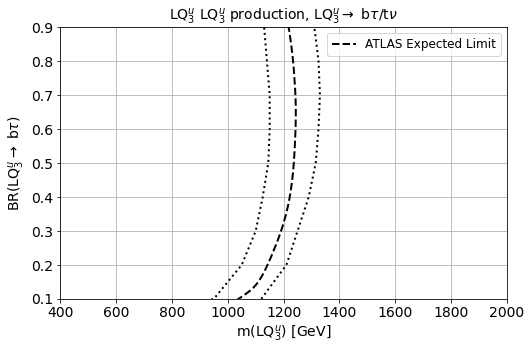

In [15]:
plt.figure(figsize = (8,5))
lw = 2
plt.plot(mass_Z95CL_ATLAS, beta_ATLAS, '--', color='black', lw=lw, label=r'ATLAS Expected Limit') 
plt.plot(mass_Z95CL_ATLAS_plus1sig, beta_ATLAS_plus1sig, ':', color='black', lw=2) 
plt.plot(mass_Z95CL_ATLAS_minus1sig, beta_ATLAS_minus1sig, ':', color='black', lw=2) 
plt.xlim([400, 2000])
#plt.ylim([0., 1])
plt.ylim([0.1, 0.9])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^u$) [GeV]', fontsize=14)
plt.ylabel(r'BR(LQ$_3^u \rightarrow$ b$\tau$)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'LQ$_3^u$ LQ$_3^u$ production, LQ$_3^u \rightarrow$ b$\tau$/t$\nu$', fontsize=14)
plt.legend(fontsize=12)
plt.show()

<ipython-input-16-72da3eef3c85>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(mass_16bins, beta, '-ok', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
<ipython-input-16-72da3eef3c85>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(mass_16bins_plus, beta, ':ok', color='darkorange', lw=lw)
<ipython-input-16-72da3eef3c85>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(mass_16bins_min, beta, ':ok', color='darkorange', lw=lw)
<ipython-input-16-72da3eef3c85>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedenc

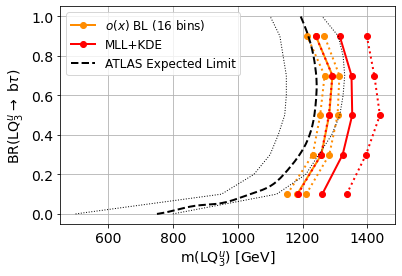

In [16]:
plt.figure()
lw = 2

plt.plot(mass_16bins, beta, '-ok', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(mass_16bins_plus, beta, ':ok', color='darkorange', lw=lw) 
plt.plot(mass_16bins_min, beta, ':ok', color='darkorange', lw=lw)
plt.plot(mass_MLL, beta, '-ok', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(mass_MLL_plus, beta, ':ok', color='red', lw=lw) 
plt.plot(mass_MLL_min, beta, ':ok', color='red', lw=lw) 
plt.plot(mass_Z95CL_ATLAS, beta_ATLAS, '--', color='black', lw=lw, label=r'ATLAS Expected Limit') 
plt.plot(mass_Z95CL_ATLAS_plus1sig, beta_ATLAS_plus1sig, ':', color='black', lw=1) 
plt.plot(mass_Z95CL_ATLAS_minus1sig, beta_ATLAS_minus1sig, ':', color='black', lw=1) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^u$) [GeV]', fontsize=14)
plt.ylabel(r'BR(LQ$_3^u \rightarrow$ b$\tau$)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
#plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(fontsize=12)
plt.show()

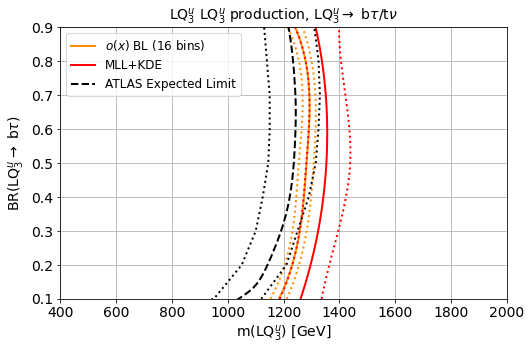

In [17]:
mass_Z95CL_16bins = interp1d(beta, mass_16bins, kind='cubic')
mass_Z95CL_16bins_plus = interp1d(beta, mass_16bins_plus, kind='cubic')
mass_Z95CL_16bins_min = interp1d(beta, mass_16bins_min, kind='cubic')
mass_Z95CL_MLL = interp1d(beta, mass_MLL, kind='cubic')
mass_Z95CL_MLL_plus = interp1d(beta, mass_MLL_plus, kind='cubic')
mass_Z95CL_MLL_min = interp1d(beta, mass_MLL_min, kind='cubic')

plotX_beta = np.linspace(min(beta), max(beta), num=50, endpoint=True)

#plt.figure()
plt.figure(figsize = (8,5))
lw = 2

plt.plot(mass_Z95CL_16bins(plotX_beta), plotX_beta, '-', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)') 
plt.plot(mass_Z95CL_16bins_plus(plotX_beta), plotX_beta, ':', color='darkorange', lw=lw)
plt.plot(mass_Z95CL_16bins_min(plotX_beta), plotX_beta, ':', color='darkorange', lw=lw)
plt.plot(mass_Z95CL_MLL(plotX_beta), plotX_beta, '-', color='red', lw=lw, label=r'MLL+KDE')
plt.plot(mass_Z95CL_MLL_plus(plotX_beta), plotX_beta, ':', color='red', lw=lw)
plt.plot(mass_Z95CL_MLL_min(plotX_beta), plotX_beta, ':', color='red', lw=lw)
plt.plot(mass_Z95CL_ATLAS, beta_ATLAS, '--', color='black', lw=lw, label=r'ATLAS Expected Limit') 
plt.plot(mass_Z95CL_ATLAS_plus1sig, beta_ATLAS_plus1sig, ':', color='black', lw=2) 
plt.plot(mass_Z95CL_ATLAS_minus1sig, beta_ATLAS_minus1sig, ':', color='black', lw=2) 

plt.xlim([400, 2000])
#plt.ylim([0., 1])
plt.ylim([0.1, 0.9])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^u$) [GeV]', fontsize=14)
plt.ylabel(r'BR(LQ$_3^u \rightarrow$ b$\tau$)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'LQ$_3^u$ LQ$_3^u$ production, LQ$_3^u \rightarrow$ b$\tau$/t$\nu$', fontsize=14)
plt.legend(fontsize=12)
plt.show()

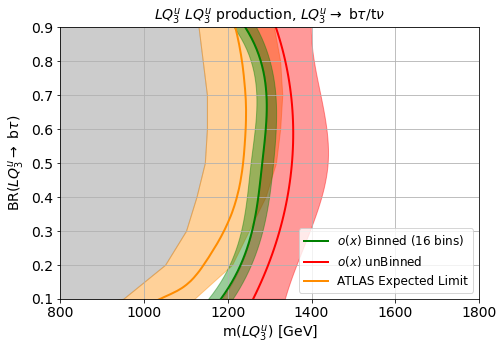

In [19]:

#plt.figure()
lw = 2

test_A = pd.DataFrame({'ATLAS_beta': beta_ATLAS_plus1sig,
                     'ATLAS_low':mass_Z95CL_ATLAS_plus1sig,
                     'ATLAS_up':mass_Z95CL_ATLAS_minus1sig})


test = pd.DataFrame({'BR': plotX_beta.tolist(),
                    'MLL_low': mass_Z95CL_MLL_plus(plotX_beta).tolist(),
                      'MLL_up': mass_Z95CL_MLL_min(plotX_beta).tolist(),
                     '16bins_low': mass_Z95CL_16bins_plus(plotX_beta).tolist(),
                      '16bins_up': mass_Z95CL_16bins_min(plotX_beta).tolist()})
mineral_names = test.columns[1:]

fig = plt.figure(figsize=(30, 5))
gs = gridspec.GridSpec(nrows=1, ncols=4, wspace=0)

ax = fig.add_subplot(gs[0, 1])
for mineral_name in mineral_names[:-1]:
    ax.plot(test[mineral_name], test['BR'], linewidth=2, color='None')
    
    
ax.fill_betweenx(test_A['ATLAS_beta'], 0, test_A['ATLAS_low'], color='gray', alpha=0.4)
ax.fill_betweenx(test_A['ATLAS_beta'], test_A['ATLAS_low'], test_A['ATLAS_up'], color='darkorange', alpha=0.4)

colors = [ "None", "red", "None", "green", "None"]
previous_curve = 0
previous_name = ''
for mineral_name, color in zip(mineral_names, colors):
    ax.fill_betweenx(test['BR'], previous_curve, test[mineral_name], color=color, alpha=0.4)
    previous_curve = test[mineral_name]
    previous_name = mineral_name
    
    
    

plt.plot(mass_Z95CL_16bins(plotX_beta), plotX_beta, '-', color='green', lw=lw, label=r'$o(x)$ Binned (16 bins)') 
plt.plot(mass_Z95CL_MLL(plotX_beta), plotX_beta, '-', color='red', lw=lw, label=r'$o(x)$ unBinned')
plt.plot(mass_Z95CL_ATLAS, beta_ATLAS, '-', color='darkorange', lw=lw, label=r'ATLAS Expected Limit') 

plt.xlim([800, 1800])
#plt.ylim([0., 1])
plt.ylim([0.1, 0.9])
#plt.xscale('log')
plt.xlabel('m($LQ_3^u$) [GeV]', fontsize=14)
plt.ylabel(r'BR($LQ_3^u \rightarrow$ b$\tau$)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$LQ_3^u$ $LQ_3^u$ production, $LQ_3^u \rightarrow$ b$\tau$/t$\nu$', fontsize=14)
plt.legend(loc = 'lower right', fontsize=12)
plt.savefig('exclusion_LQup_no_uncertainty.pdf', bbox_inches='tight')
plt.show()